# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [5]:
!pip install keras
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

  Using cached https://files.pythonhosted.org/packages/ad/fd/6bfe87920d7f4fd475acd28500a42482b6b84479832bdc0fe9e589a60ceb/Keras-2.3.1-py2.py3-none-any.whl
You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


Using TensorFlow backend.


In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y      

In [8]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [10]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 50
BATCH_SIZE = 256

momentum=0.9
nesterov= True


optimizer_SGD = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=nesterov, momentum=momentum)
optimizer_AdaGrad = keras.optimizers.Adagrad(learning_rate=LEARNING_RATE)
optimizer_RMSprop = keras.optimizers.RMSprop(learning_rate=LEARNING_RATE)
optimizer_Adam = keras.optimizers.Adam(learning_rate=LEARNING_RATE)


optimizer = (optimizer_SGD,optimizer_AdaGrad,optimizer_RMSprop,optimizer_Adam)


Instructions for updating:
Colocations handled automatically by placer.


In [12]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""


for opt in optimizer:
    #keras.backend.clear_session() # 把舊的 Graph 清掉
    print(f"optimizer = {opt}")
    
    model = build_mlp(input_shape=x_train.shape[1:])    
    
    optimizer = opt
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = f"{opt}"
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


optimizer = <keras.optimizers.SGD object at 0x7f1728161390>
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 64us/step - loss: 2.0891 - accuracy: 0.2594 - val_loss: 1.9368 - val_accuracy: 0.3254
Epoch 2/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.8715 - accuracy: 0.3435 - val_loss: 1.8274 - val_accuracy: 0.3629
Epoch 3/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7933 - accuracy: 0.3717 - val_loss: 1.7716 - val_accuracy: 0.3792
Epoch 4/50
50000/50000 [==============================] - 3s 67us/step - loss: 1.7460 - accuracy: 0.3883 - val_loss: 1.7300 - val_accuracy: 0.4006
Epoch 5/50
50000/50000 [==============================] - 3s 66us/step - loss: 1.7094 - accuracy: 0.4029 - val_loss: 1.6986 - val_accuracy: 0.4073
Epoch 6/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.6788 - accuracy: 0.4141 - val_loss: 1.6851 - val_accuracy: 0.4086
Epoch 7/

Epoch 5/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6373 - accuracy: 0.4252 - val_loss: 1.6427 - val_accuracy: 0.4185
Epoch 6/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.6089 - accuracy: 0.4366 - val_loss: 1.6243 - val_accuracy: 0.4240
Epoch 7/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5853 - accuracy: 0.4450 - val_loss: 1.6358 - val_accuracy: 0.4169
Epoch 8/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.5674 - accuracy: 0.4520 - val_loss: 1.5856 - val_accuracy: 0.4448
Epoch 9/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.5486 - accuracy: 0.4580 - val_loss: 1.5607 - val_accuracy: 0.4499
Epoch 10/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.5328 - accuracy: 0.4624 - val_loss: 1.5954 - val_accuracy: 0.4386
Epoch 11/50
50000/50000 [==============================] - 3s 60us/step - loss: 1.5177 - accuracy: 0.4691 - val_loss:

Epoch 10/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4715 - accuracy: 0.4750 - val_loss: 1.6354 - val_accuracy: 0.4124
Epoch 11/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.4429 - accuracy: 0.4850 - val_loss: 1.6288 - val_accuracy: 0.4183
Epoch 12/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.4165 - accuracy: 0.4963 - val_loss: 1.5332 - val_accuracy: 0.4558
Epoch 13/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3877 - accuracy: 0.5056 - val_loss: 1.6261 - val_accuracy: 0.4330
Epoch 14/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3663 - accuracy: 0.5097 - val_loss: 1.5306 - val_accuracy: 0.4661
Epoch 15/50
50000/50000 [==============================] - 3s 62us/step - loss: 1.3426 - accuracy: 0.5217 - val_loss: 1.5955 - val_accuracy: 0.4397
Epoch 16/50
50000/50000 [==============================] - 3s 61us/step - loss: 1.3189 - accuracy: 0.5321 - val_

50000/50000 [==============================] - 3s 64us/step - loss: 1.2630 - accuracy: 0.5523 - val_loss: 1.3805 - val_accuracy: 0.5168
Epoch 15/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.2389 - accuracy: 0.5595 - val_loss: 1.4330 - val_accuracy: 0.4908
Epoch 16/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.2235 - accuracy: 0.5639 - val_loss: 1.3984 - val_accuracy: 0.5082
Epoch 17/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.2000 - accuracy: 0.5718 - val_loss: 1.3760 - val_accuracy: 0.5174
Epoch 18/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1812 - accuracy: 0.5797 - val_loss: 1.4257 - val_accuracy: 0.5066
Epoch 19/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1570 - accuracy: 0.5886 - val_loss: 1.3709 - val_accuracy: 0.5180
Epoch 20/50
50000/50000 [==============================] - 3s 64us/step - loss: 1.1372 - accuracy: 0.5950 - val_loss: 1.3845

  Using cached https://files.pythonhosted.org/packages/4e/11/06958a2b895a3853206dea1fb2a5b11bf044f626f90745987612af9c8f2c/matplotlib-3.1.2-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f8/a1/5742b56282449b1c0968197f63eae486eca2c35dcd334bab75ad524e0de1/kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
    100% |████████████████████████████████| 71kB 2.4MB/s ta 0:00:011
You are using pip version 19.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


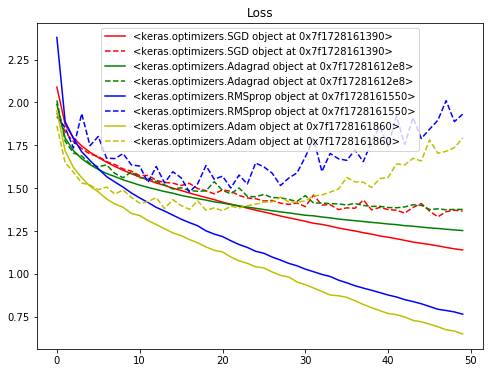

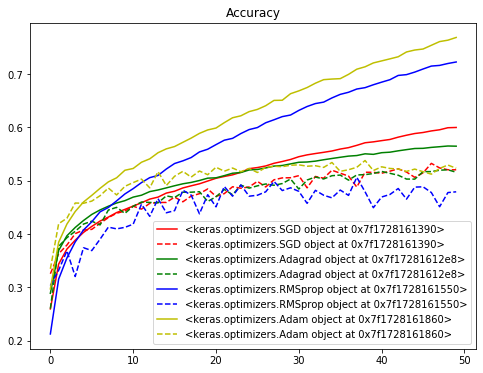

In [14]:
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()